In [1]:
# Data management
import pandas as pd

# Math and Stat modules
import numpy as np
from scipy.stats import sem
from random import choice

#Data preprocessing and trasformation (ETL)
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

#Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
#Visualization

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score
from sklearn.metrics import PrecisionRecallDisplay

In [2]:
breast_dataset = pd.read_csv('OneDrive/Documenti/GitHub/MDS-python/Marcello Brambilla/breast-cancer.csv')


In [3]:
breast_dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
breast_label = breast_dataset['diagnosis'].map(
    {'B':0,
     'M':1
    }
).values
breast_dataset.drop(columns=['id','diagnosis'], inplace = True)

In [5]:
data_preprocessing = ColumnTransformer([
    ('scaler',StandardScaler(), ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
    ],
    remainder = 'passthrough'
)

In [6]:
feature_matrix = data_preprocessing.fit_transform(breast_dataset)

In [7]:
fm = pd.DataFrame(feature_matrix)
fm

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [8]:
X_train, y_train= feature_matrix, breast_label

## perceptron

In [9]:
for _ in range(10):
    X_train,  y_train = feature_matrix, breast_label
    perceptron = Perceptron()
    perceptron.fit(X_train, y_train) # apprendo su training
    predicted_validation = perceptron.predict(X_train) # predico sul validation
    print(np.sum(predicted_validation == y_train)/len(y_train))

0.9789103690685413
0.9789103690685413
0.9789103690685413
0.9789103690685413
0.9789103690685413
0.9789103690685413
0.9789103690685413
0.9789103690685413
0.9789103690685413
0.9789103690685413


In [10]:
p = Perceptron()
cvs = cross_val_score(p, X_train, y_train, cv = 5)

In [11]:
cvs

array([0.96491228, 0.96491228, 0.97368421, 0.95614035, 0.96460177])

In [12]:
np.mean(cvs)

0.9648501785437045

In [13]:
np.std(cvs)

0.005549245701079563

In [14]:
y_train_predicted = cross_val_predict(p, X_train, y_train, cv = 5)

In [15]:
as1 = accuracy_score(y_train, y_train_predicted, normalize=True)
as1

0.9648506151142355

In [16]:
confusion_matrix(y_train, y_train_predicted)

array([[347,  10],
       [ 10, 202]], dtype=int64)

In [17]:
precision_score(y_train, y_train_predicted)

0.9528301886792453

In [18]:
recall_score(y_train, y_train_predicted)

0.9528301886792453

In [19]:
f1_score(y_train, y_train_predicted)

0.9528301886792453

## Logistic regression

In [20]:
logit_cls = LogisticRegression(max_iter = 1000)
y_scores = cross_val_predict(logit_cls, X_train, y_train, cv = 5)

In [21]:
cvs_log = cross_val_score(logit_cls, X_train, y_train, cv = 5)

In [22]:
cvs_log

array([0.98245614, 0.98245614, 0.97368421, 0.97368421, 0.99115044])

In [23]:
prec, recall, soglia = precision_recall_curve(y_train, y_scores)

In [24]:
precision_score(y_train, y_scores), recall_score(y_train, y_scores), f1_score(y_train, y_scores)

(0.9855072463768116, 0.9622641509433962, 0.973747016706444)

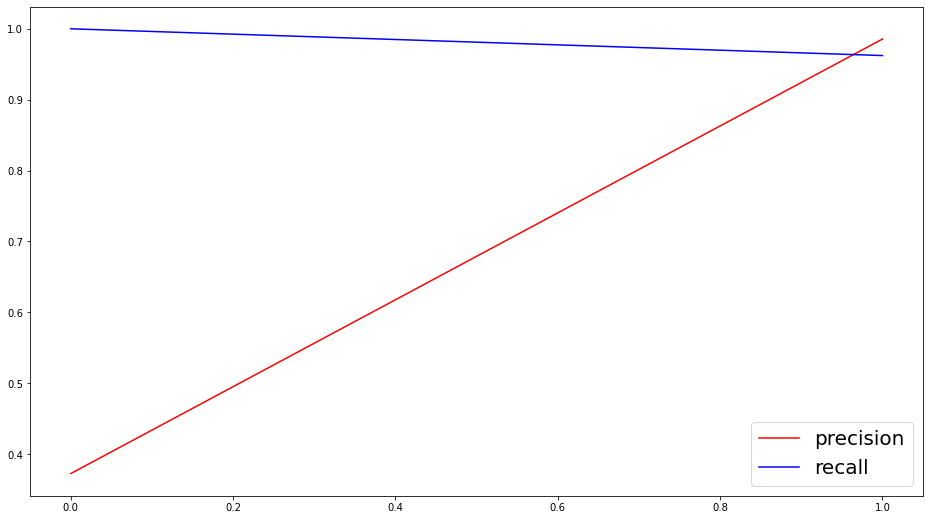

In [25]:
fig_prc = plt.figure(figsize=(16,9))
ax = fig_prc.add_subplot()
ax.plot(soglia, prec[:-1], 'r', label = 'precision')
ax.plot(soglia, recall[:-1], 'b', label = 'recall')
ax.legend(fontsize=20)

## support vector machine SVM

In [26]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [27]:
Cs = [0.01, 0.1, 1, 10, 100]# definire un insieme di valori di C tenendo in considerazione le precedenti osservazioni sul suo effetto 
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(Cs):
    print('Training SVM per C =', c, i)
    svm_cls = LinearSVC(C = c, max_iter=50000)

Training SVM per C = 0.01 0
Training SVM per C = 0.1 1
Training SVM per C = 1 2
Training SVM per C = 10 3
Training SVM per C = 100 4


<Figure size 1296x230.4 with 0 Axes>

In [28]:
y_train_predicted = cross_val_predict(svm_cls, X_train, y_train, cv = 5)

C:\Users\marce\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [29]:
recall_score(y_train, y_train_predicted)

0.9528301886792453

## decision tree

In [30]:
min_leaf = [5, 10, 15, 20, 25, 30]

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for mlf in min_leaf:
    dt_mlf = DecisionTreeClassifier(min_samples_leaf=mlf, random_state=42, max_depth=15)

In [31]:
y_train_predicted = cross_val_predict(dt_mlf, X_train, y_train, cv = 5)

In [32]:
recall_score(y_train, y_train_predicted)

0.9433962264150944

## Random forest

In [33]:
X_train, y_train = feature_matrix, breast_label

In [34]:
len(y_train[y_train == 1])/len(y_train)

0.37258347978910367

In [35]:
rnf_clf = RandomForestClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
et_clf = ExtraTreesClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
scores_rnf = cross_val_score(rnf_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
scores_et = cross_val_score(et_clf, X_train, y_train, cv=5, scoring='f1',n_jobs=-1)

In [36]:
rnf_clf.fit(feature_matrix,breast_label)

RandomForestClassifier(max_features=10, max_leaf_nodes=64, n_estimators=250,
                       n_jobs=-1)

In [37]:
y_train_predicted = cross_val_predict(rnf_clf, X_train, y_train, cv = 5)

In [38]:
recall_score(y_train, y_train_predicted)

0.9339622641509434